In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
data = pd.read_csv("Highest Holywood Grossing Movies.csv")
data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  918 non-null    int64 
 1   Title                       918 non-null    object
 2   Movie Info                  918 non-null    object
 3   Distributor                 918 non-null    object
 4   Release Date                800 non-null    object
 5   Domestic Sales (in $)       918 non-null    int64 
 6   International Sales (in $)  918 non-null    int64 
 7   World Sales (in $)          918 non-null    int64 
 8   Genre                       918 non-null    object
 9   Movie Runtime               918 non-null    object
 10  License                     744 non-null    object
dtypes: int64(4), object(7)
memory usage: 79.0+ KB


# Data Cleaning

In [36]:
data= data.drop(["Unnamed: 0"], axis=1)
data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [38]:
#I want to replace values of Movie Runtime to a numeric values of hours

runtime = data["Movie Runtime"].str.split(expand=True).iloc[:, [0, 2]]

In [39]:
runtime[2].fillna(0, inplace=True)
runtime = runtime.astype('int64')

In [40]:
runtime["hour"] = runtime[0]+runtime[2]/60

In [41]:
data["Movie Runtime"] = runtime["hour"]

In [42]:
data['Release Date']= pd.to_datetime(data['Release Date'])
data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2.300000,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3.016667,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2.700000,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2.233333,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2.483333,NaN


In [43]:
# I want to replace some of column names

data.rename(columns={'Domestic Sales (in $)': 'Domestic Sales',
                     'International Sales (in $)': 'International Sales',
                     'World Sales (in $)': 'World Sales'}, inplace=True)

In [44]:
#I want to change the unit of 'Domestic Sales (in $)', 'International Sales (in $)','World Sales (in $)'into unit of 1 million dollars 
data[['Domestic Sales', 'International Sales', 'World Sales']] = data[['Domestic Sales', 'International Sales', 'World Sales']].apply(lambda x: x/(10**6))
data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales,International Sales,World Sales,Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936.662225,1132.859475,2069.521700,"['Action', 'Adventure', 'Sci-Fi']",2.300000,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858.373000,1939.128328,2797.501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3.016667,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760.507625,2086.738578,2847.246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2.700000,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaT,700.426566,647.171407,1347.597973,"['Action', 'Adventure', 'Sci-Fi']",2.233333,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaT,678.815482,1369.544272,2048.359754,"['Action', 'Adventure', 'Sci-Fi']",2.483333,NaN


In [45]:
data.dropna(how='all', inplace=True)

In [46]:
num_col= ['Domestic Sales', 'International Sales', 'World Sales', 'Movie Runtime']
cat_col= ['Title', 'Movie Info', 'Distributor', 'License', 'Genre']
date_col= 'Release Date'

In [47]:
data[num_col].describe()

,Domestic Sales,International Sales,World Sales,Movie Runtime
count,918.000000,918.000000,918.000000,918.000000
mean,167.746918,230.143436,396.866826,1.942847
std,104.036045,217.601104,308.262916,0.347929
min,80.360843,0.000260,81.600000,1.266667
25%,101.607072,88.456200,200.556355,1.666667
50%,132.135096,163.881928,301.941607,1.916667
75%,191.390486,288.557651,475.071823,2.166667
max,936.662225,2086.738578,2847.246203,3.350000


# Data Exploration


<AxesSubplot:>

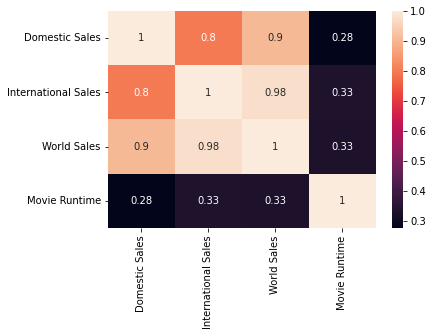

In [48]:
sns.heatmap(data[num_col].corr(), annot=True)

Text(0.5, 1.0, 'Number of Movies by Distributor')

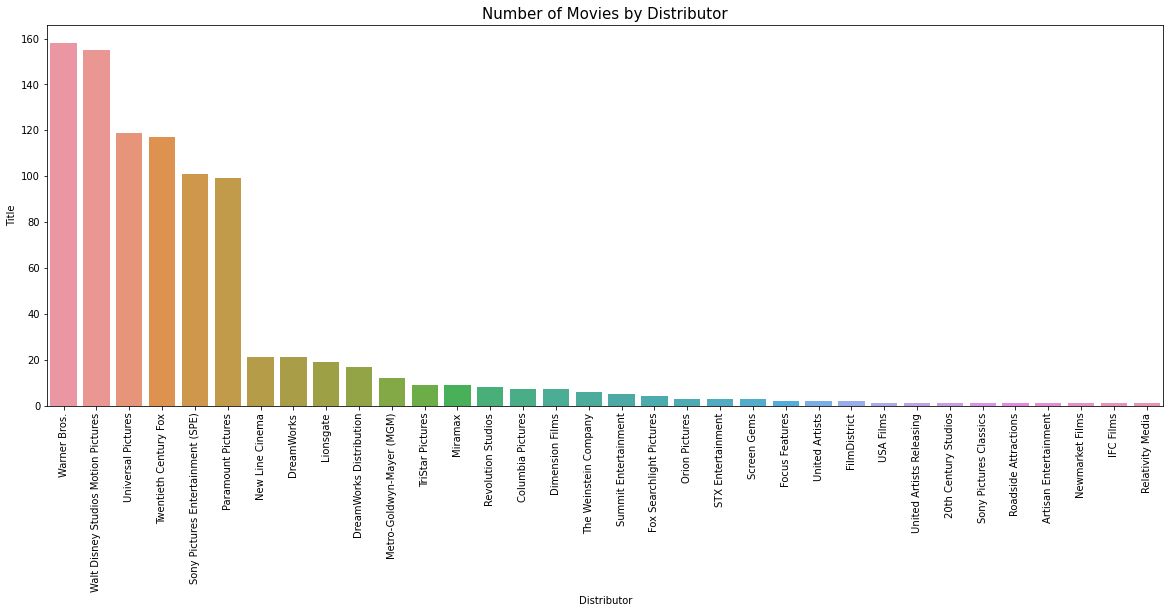

In [49]:
fig, ax=plt.subplots(figsize=(20, 7))
sns.barplot(x='Distributor', y='Title', data=data.groupby('Distributor', as_index=False)['Title'].count().sort_values('Title', ascending=False))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Number of Movies by Distributor', fontsize=15)


Text(0.5, 1.0, 'Total Sale of Movies by Distributor')

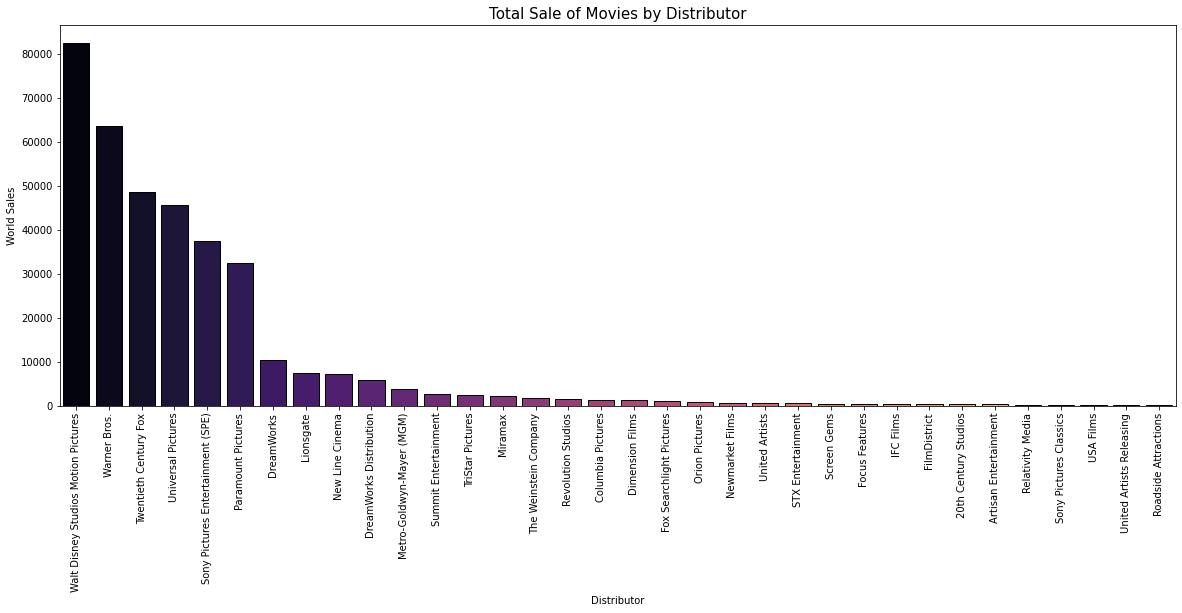

In [50]:
fig, ax=plt.subplots(figsize=(20, 7))
sns.barplot(x='Distributor', y='World Sales', palette='magma', edgecolor='black',
            data= data.groupby('Distributor', as_index=False)['World Sales'].sum().sort_values('World Sales', ascending=False))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Total Sale of Movies by Distributor', fontsize=15)


<AxesSubplot:title={'center':'Number of Movies by Licenses'}, xlabel='License'>

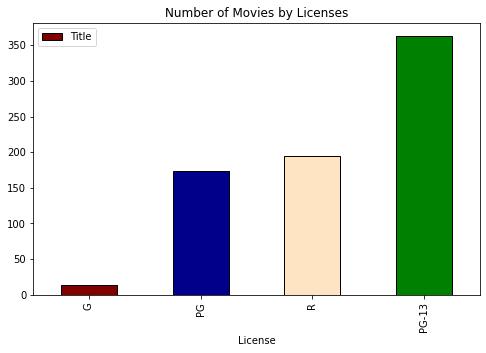

In [52]:
color=['maroon', 'darkblue', 'bisque', 'green']
data.dropna(subset=['License']).groupby('License', as_index=False)['Title'].count().sort_values('Title').plot.bar(
    x='License', y='Title', color=color, edgecolor='black', figsize=(8, 5),
    title='Number of Movies by Licenses')